In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
bc = load_breast_cancer()

In [8]:
print(bc.data.shape,'\n' ,bc.data)

(569, 30) 
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [10]:
print(bc.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
print(bc.target, '\n',bc.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [14]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [84]:
x = bc.data
y = bc.target

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 0)

In [25]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [29]:
print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts = True))

(array([0, 1]), array([170, 285], dtype=int64))
(array([0, 1]), array([42, 72], dtype=int64))


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,26)
acc = {}
acc_arr = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    acc[k] = metrics.accuracy_score(y_test, y_pred)
    acc_arr.append(metrics.accuracy_score(y_test, y_pred))

In [37]:
acc_arr

[0.9122807017543859,
 0.868421052631579,
 0.9035087719298246,
 0.9035087719298246,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9035087719298246,
 0.9035087719298246,
 0.9035087719298246,
 0.9035087719298246,
 0.9035087719298246,
 0.9035087719298246,
 0.9035087719298246,
 0.9035087719298246,
 0.9210526315789473,
 0.9035087719298246,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473]

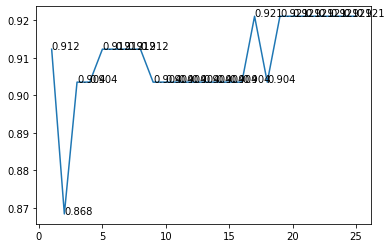

In [110]:
import numpy
from matplotlib import pyplot

fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.plot(k_range,acc_arr)
for i,j in zip(k_range,acc_arr):
    ax.annotate(round(float(str(j)),3),xy=(i,j))
pyplot.show()

In [92]:
knn_cv = KNeighborsClassifier( n_neighbors = 19)

cv_scores = cross_val_score(knn_cv, x , y, cv = 5)
cv_scores
print("Means of CV :", np.mean(cv_scores))

Means of CV : 0.9298807233551367


In [112]:
knn2 = KNeighborsClassifier()

param_grid = { 'n_neighbors' : np.arange(1, 30)}

knn_gscv = GridSearchCV(knn2, param_grid, cv = 5)

knn_gscv.fit(x,y)

C:\Users\tarit_dlxforq\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
print(knn_gscv.best_params_," ", knn_gscv.best_score_)

{'n_neighbors': 12}   0.9332161687170475


In [120]:
y_pred = knn_gscv.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.9122807017543859